# Problem 1: Data Acquisition and Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date
%matplotlib inline

In [3]:
graffiti_df = pd.read_csv('/Users/saptarshighose/Downloads/Machine Learning/Homework 1/311_Service_Requests_-_Graffiti_Removal.csv')

In [4]:
alley_df = pd.read_csv('/Users/saptarshighose/Downloads/Machine Learning/Homework 1/311_Service_Requests_-_Alley_Lights_Out.csv')

In [5]:
vacant_df = pd.read_csv('/Users/saptarshighose/Downloads/Machine Learning/Homework 1/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv')

In [6]:
graffiti_df.columns = map(str.lower, graffiti_df.columns)
alley_df.columns = map(str.lower, alley_df.columns)
vacant_df.columns = map(str.lower, vacant_df.columns)

In [7]:
vacant_df.rename(columns={'service request type':'type of service request'}, inplace=True)

In [8]:
vacant_df.rename(columns={'date service request was received':'creation date'}, inplace=True)

In [9]:
frames = [graffiti_df, alley_df, vacant_df]

In [10]:
concat_df = pd.concat(frames)

In [11]:
concat_df['completion date'] = pd.to_datetime(concat_df['completion date'])

In [12]:
concat_df['creation date'] = pd.to_datetime(concat_df['creation date'])

# Count of requests by type of service

In [13]:
concat_df.groupby(['type of service request']).size()

type of service request
Alley Light Out               27896
Graffiti Removal             112779
Vacant/Abandoned Building      3666
dtype: int64

# Chart of count of requests by type of service

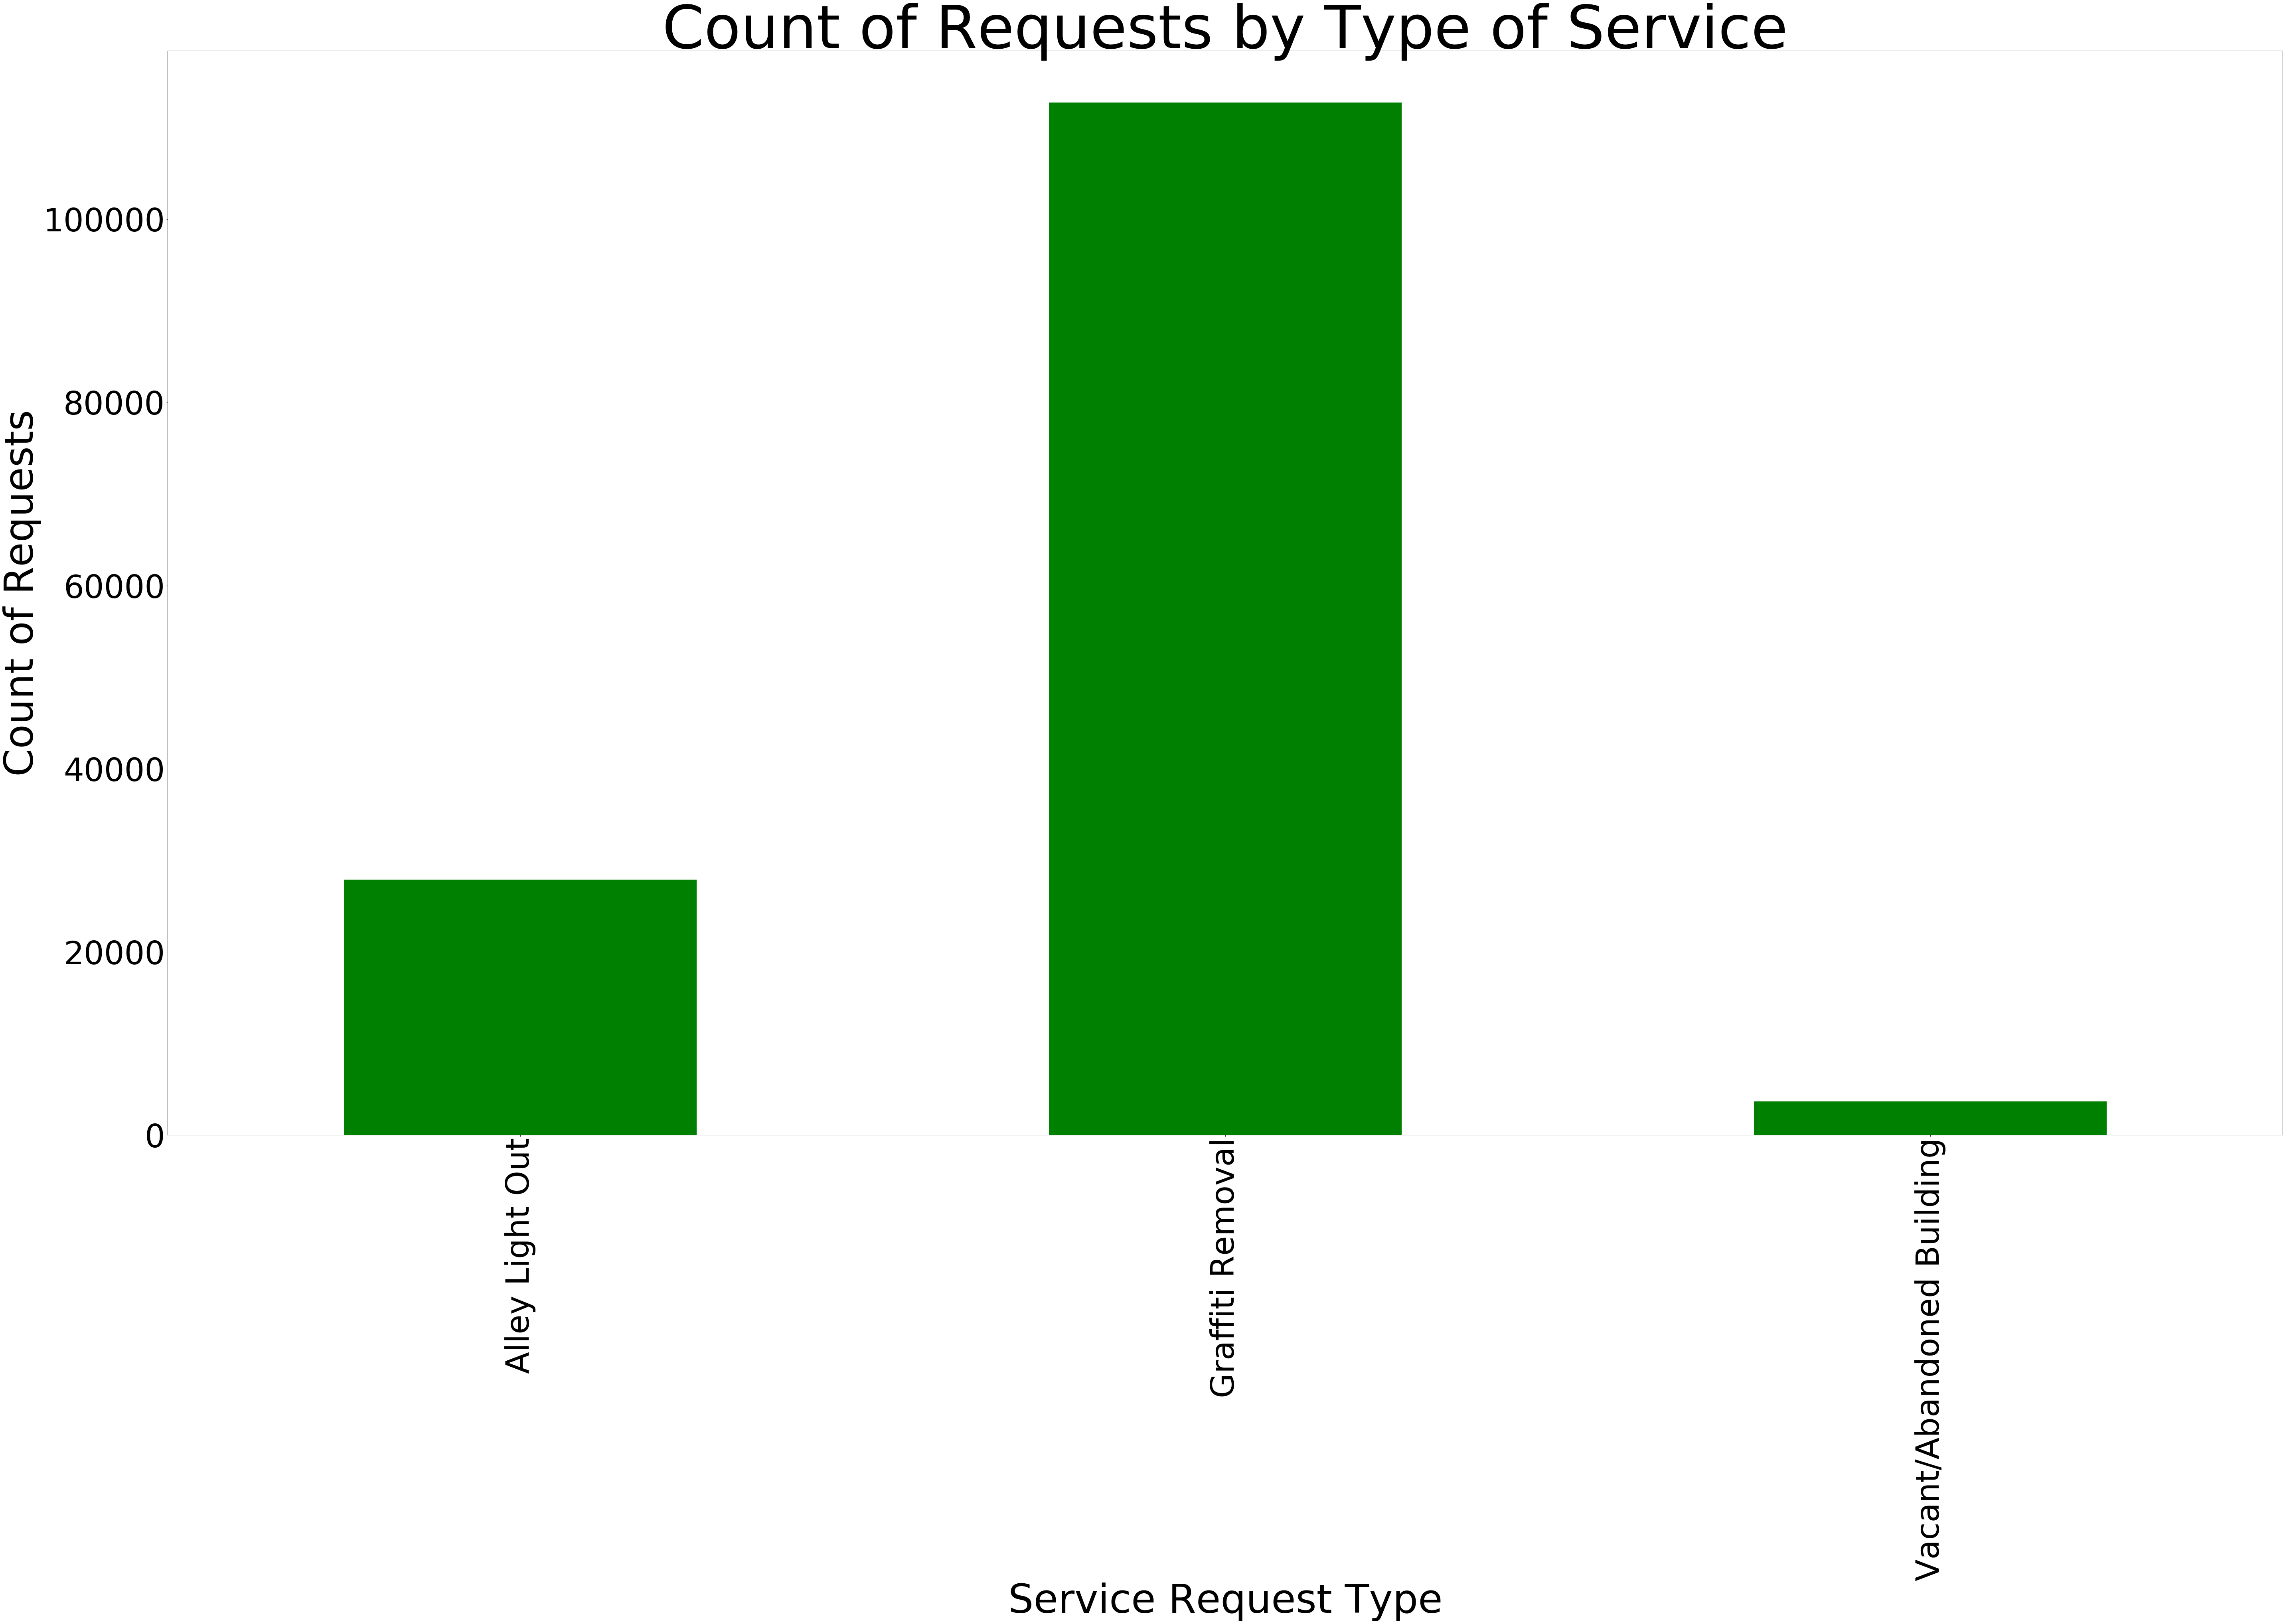

In [28]:
concat_df.groupby(['type of service request']).size().plot.bar(color = 'green')
plt.xlabel('Service Request Type', fontsize = 100)
plt.ylabel('Count of Requests', fontsize = 100)
plt.title('Count of Requests by Type of Service', fontsize = 150)
plt.tick_params(labelsize=80)

# Chart of service requests by ward

In [15]:
ward_df = concat_df.groupby('ward')
x = list(range(0,51))
y = tuple(ward_df['service request number'].count())

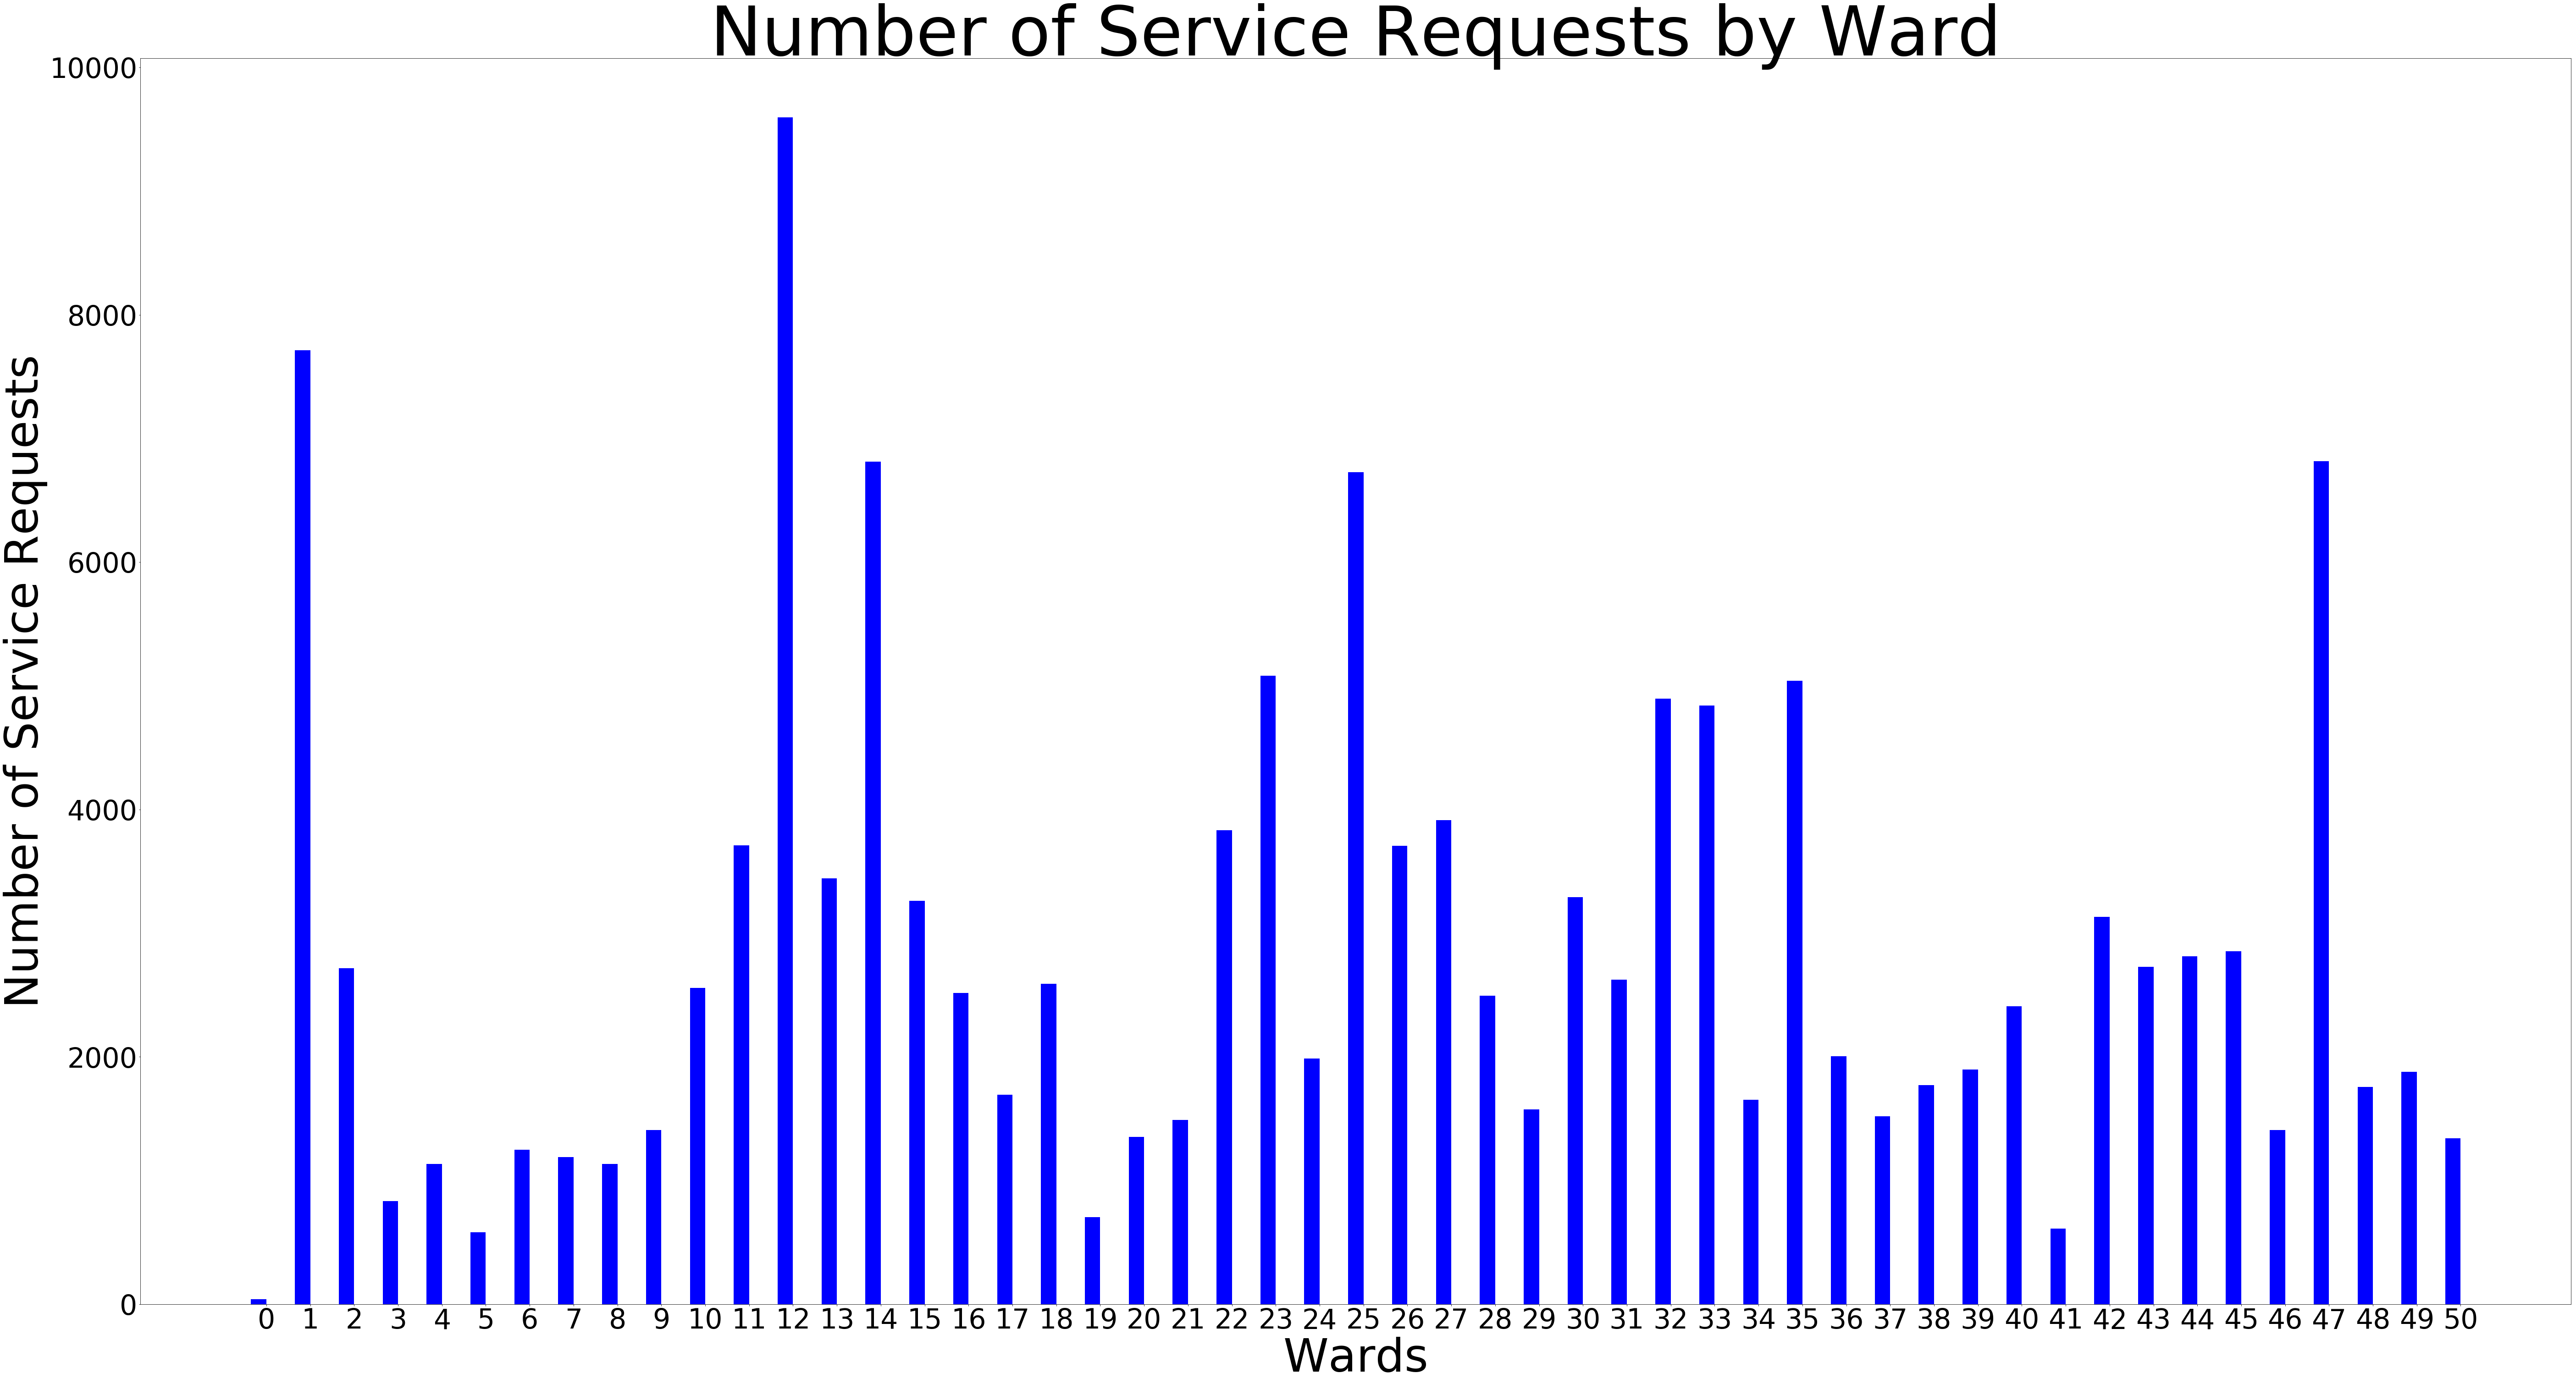

In [29]:
N = 51
counts = y

ind = np.arange(N)# the x locations for the groups
width = 0.35# the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, counts, width, color='blue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Service Requests', fontsize = 100)
ax.set_xlabel('Wards', fontsize = 100)
ax.set_title('Number of Service Requests by Ward', fontsize = 150)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x)

from pylab import rcParams
rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

# Count of graffiti requests by type of surface

In [17]:
concat_df.groupby(['type of service request','what type of surface is the graffiti on?']).size()

type of service request  what type of surface is the graffiti on?
Graffiti Removal         Aluminum Siding                              3045
                         Asphalt                                       102
                         Brick - Painted                             14633
                         Brick - Unpainted                           19482
                         Cement (Sidewalk, Alley, Wall, Curb)         9218
                         Glass                                        2643
                         Limestone                                     391
                         Marble/Granite                                160
                         Metal - Painted                             40329
                         Metal - Unpainted                            9962
                         Other / Unknown Surface                      2063
                         Other/Unknown Surface                        2257
                         Stucco   

# Count of graffiti requests by location

In [18]:
concat_df.groupby(['type of service request','where is the graffiti located?']).size()

type of service request  where is the graffiti located?       
Graffiti Removal         Alley                                     5947
                         Bench                                      745
                         Bridge                                      16
                         Concrete Pillar                             32
                         Door                                      4017
                         Door Way                                     8
                         Dumpster                                  3760
                         Express Way Job                            382
                         Express Way Job - DSS will NOT remove        1
                         Fence                                     3325
                         Front                                    32563
                         Garage                                    7991
                         Garbage Cart                              1940
 

# Count of vacant/abandoned reports by whether building is vacant or occupied

In [19]:
concat_df.groupby(['type of service request','is the building currently vacant or occupied?']).size()

type of service request    is the building currently vacant or occupied?
Vacant/Abandoned Building  Occupied                                           44
                           Vacant                                           3114
dtype: int64


# Count of vacant/abandoned reports by whether building is open or boarded

In [20]:
concat_df.groupby(['type of service request','is building open or boarded?']).size()

type of service request    is building open or boarded?
Vacant/Abandoned Building  Boarded                          594
                           Open                            2563
dtype: int64

# Count of vacant/abandoned reports by whether building is vacant due to fire

In [21]:
concat_df.groupby(['type of service request','is the building vacant due to fire?']).size()

type of service request    is the building vacant due to fire?
Vacant/Abandoned Building  False                                  2843
                           True                                    311
dtype: int64

# Count of vacant/abandoned reports by location of building on lot

In [22]:
concat_df.groupby(['type of service request','location of building on the lot (if garage, change type code to bgd).']).size()

type of service request    location of building on the lot (if garage, change type code to bgd).
Vacant/Abandoned Building  Front                                                                    2431
                           Garage                                                                     76
                           Rear                                                                      645
dtype: int64

# Count of vacant/abandoned reports by whether building is dangerous/hazardous

In [23]:
concat_df.groupby(['type of service request','is the building dangerous or hazardous?']).size()

Series([], dtype: int64)

# Count of vacant/abandoned reports by entry point, if the building is open

In [24]:
concat_df.groupby(['type of service request', 'if the building is open, where is the entry point?']).size()

type of service request    if the building is open, where is the entry point?                   
Vacant/Abandoned Building   FRONT AND REAR DOORS                                                     1
                           .                                                                         1
                           110TH STREET SIDE ONLY                                                    1
                           1ST AND 2ND FLOOR BACK DOOR OPEN                                          1
                           1ST FLOOR AND BASEMENT REAR                                               1
                           1ST FLOOR FRONT DOOR IS OPEN                                              1
                           1ST FLOOR SIDE WINDOWS                                                    1
                           1ST FLOOR WINDOW                                                          1
                           1ST FLOOR, AND 2ND FLOOR BACK DOORS ARE OPEN        

# Count of vacant/abandoned reports by whether there are any people using the property

In [25]:
concat_df.groupby(['type of service request', 'any people using property? (homeless, childen, gangs)']).size()

type of service request    any people using property? (homeless, childen, gangs)
Vacant/Abandoned Building  False                                                    1881
                           True                                                     1267
dtype: int64

# Adding response time in days to dataframe

In [33]:
concat_df['response time in days'] = (concat_df['completion date'] - concat_df['creation date']).dt.days

# Average Response Time in Days by Ward

In [37]:
y_val = tuple(service_df.groupby(by=[concat_df.index.month]).count()['creation date'])
concat_df.groupby('ward')['response time in days'].mean()

ward
0.0      4.100000
1.0      2.562508
2.0      4.733832
3.0     11.646505
4.0      8.879852
5.0     22.302231
6.0     28.171951
7.0     31.506091
8.0     26.359129
9.0     24.400749
10.0    13.228534
11.0     4.611388
12.0     3.256641
13.0    13.428203
14.0     2.896083
15.0     6.871336
16.0    11.024486
17.0    16.845928
18.0    12.736755
19.0    29.250789
20.0    16.157434
21.0    26.628676
22.0     5.681387
23.0     5.858993
24.0    11.873511
25.0     3.309127
26.0     5.669428
27.0     4.585126
28.0    10.883129
29.0    13.714484
30.0     4.521874
31.0     8.866447
32.0     2.997100
33.0     2.058995
34.0    27.564272
35.0     2.453650
36.0     6.384736
37.0    15.434547
38.0    11.825650
39.0     5.322252
40.0     2.058038
41.0    18.053913
42.0     1.068138
43.0     4.310831
44.0     2.036998
45.0     5.182528
46.0     1.639685
47.0     1.850860
48.0     2.167527
49.0     3.701877
50.0     4.293585
Name: response time in days, dtype: float64

# Chart of Number of Service Requests by Creation Month in 2017

In [35]:
service_df = concat_df
service_df.index = service_df['creation date']
y_val = tuple(service_df.groupby(by=[service_df.index.month]).count()['creation date'])

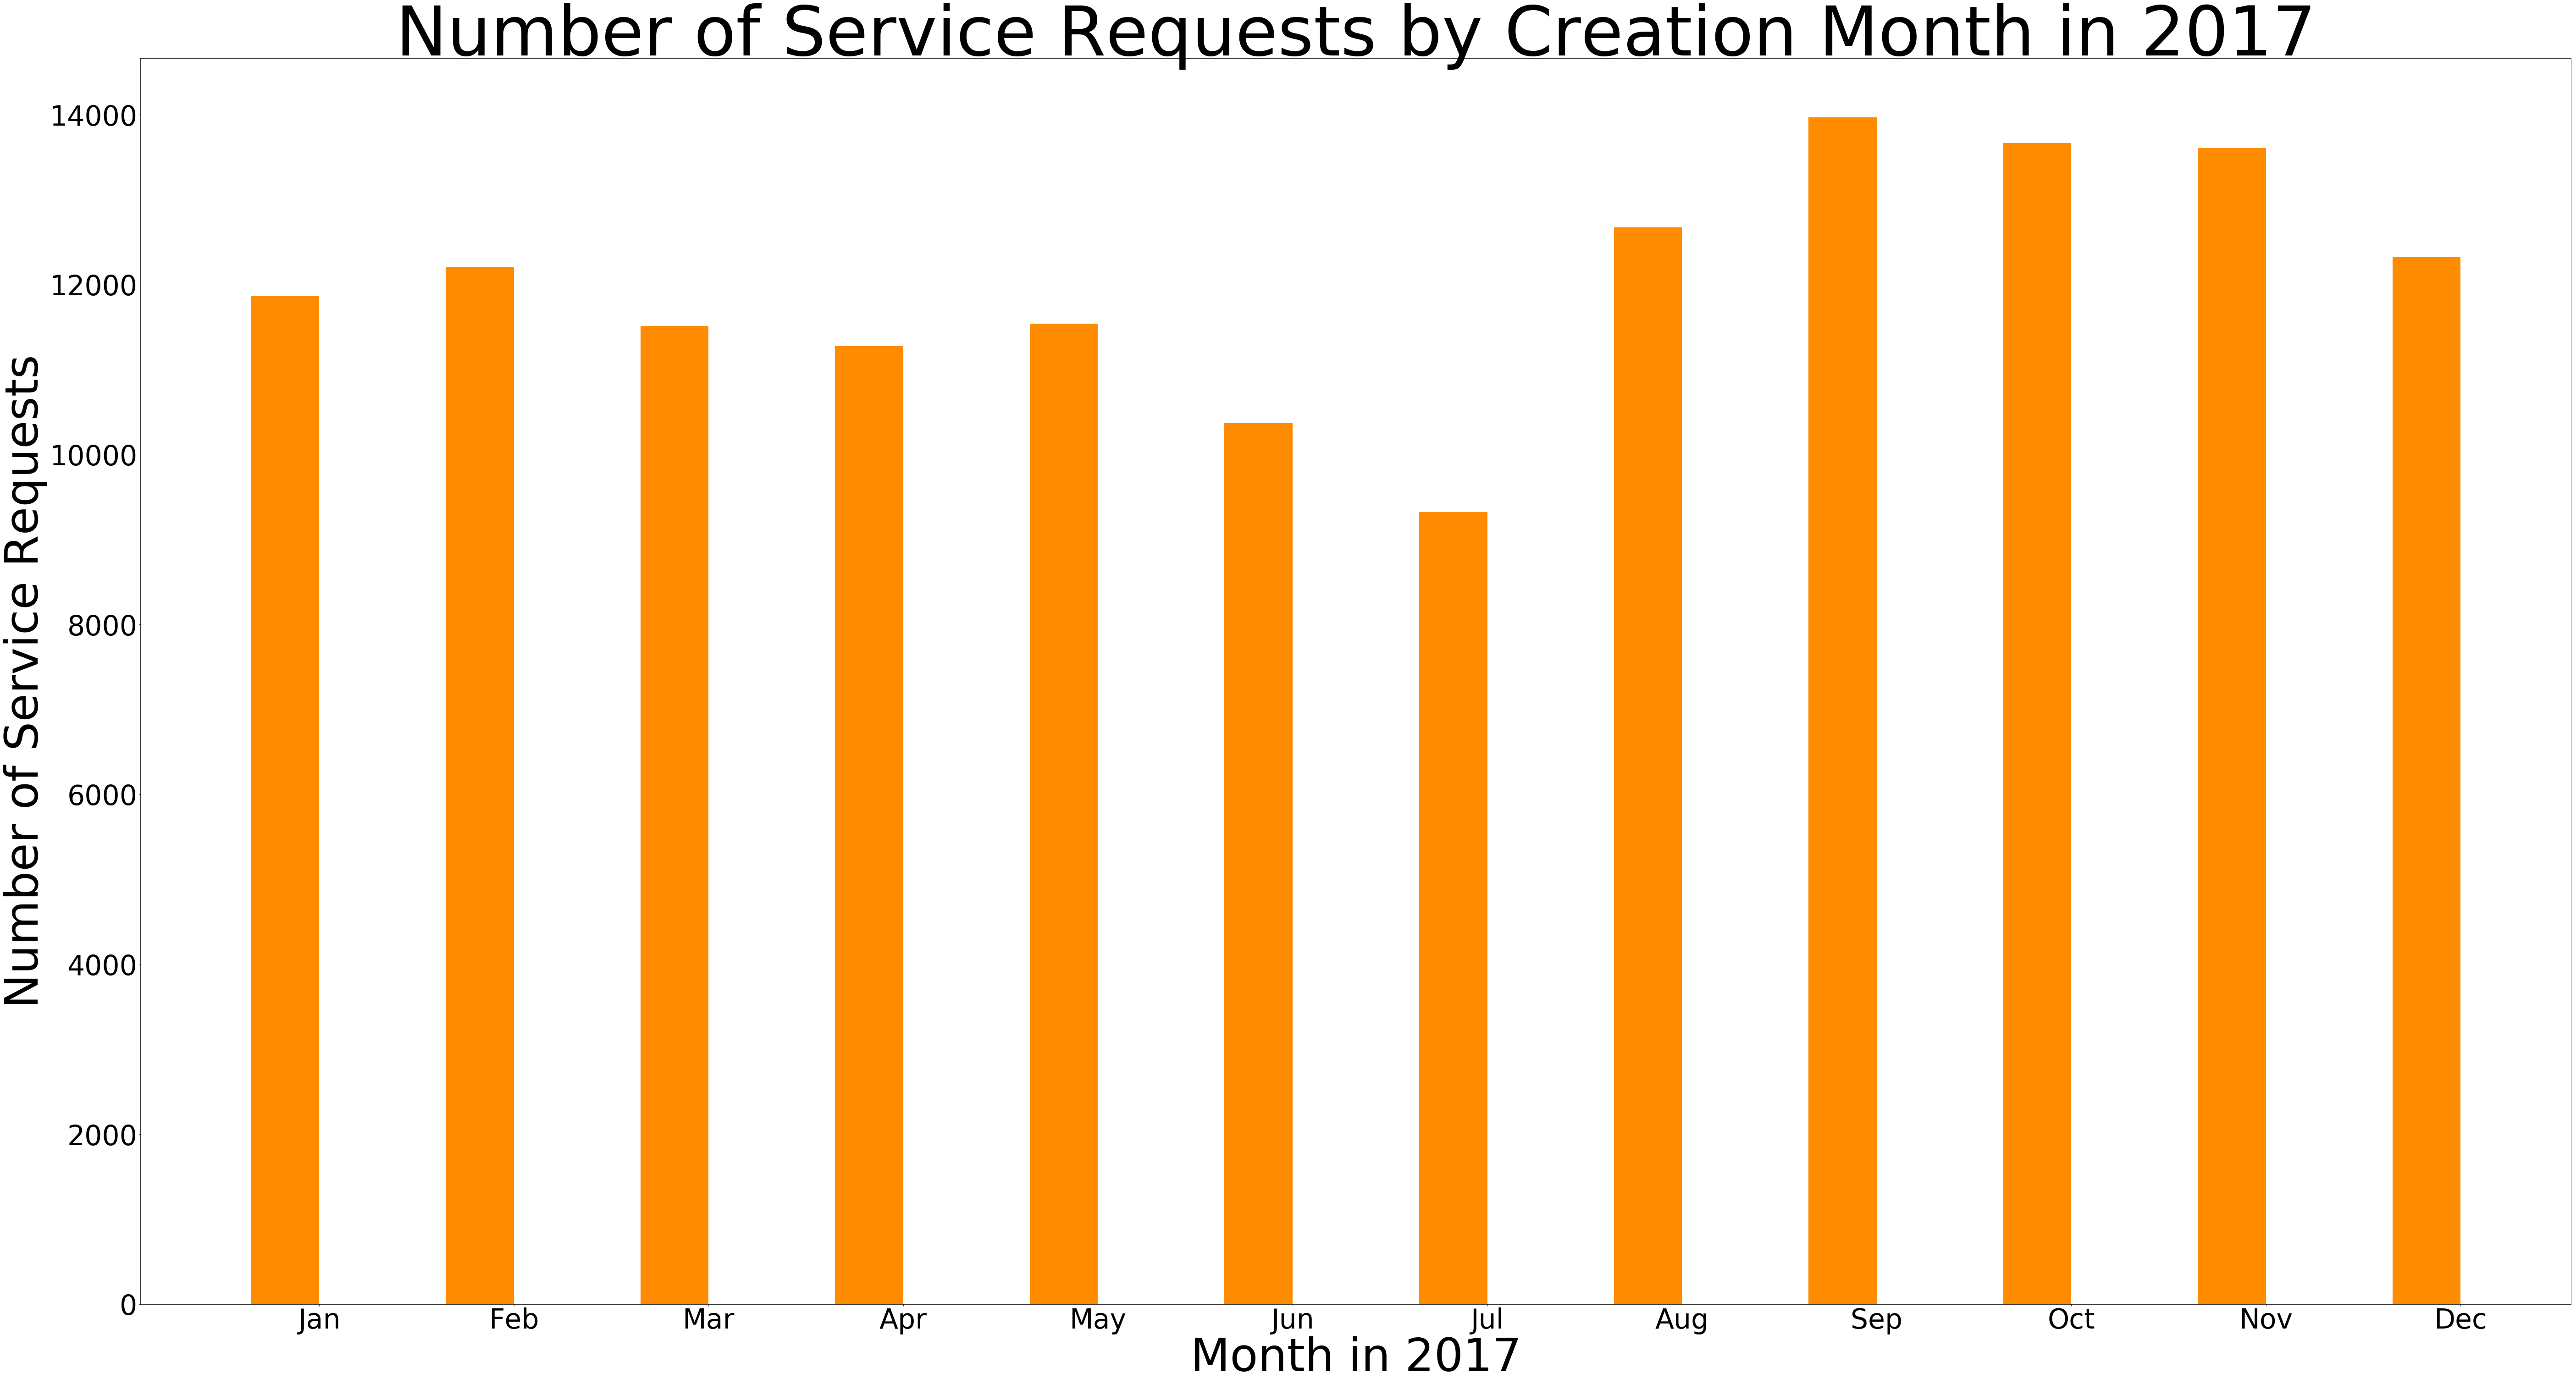

In [36]:
N = 12
x_vals = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ind = np.arange(N)# the x locations for the groups
width = 0.35

fig, ax = plt.subplots()
r = ax.bar(ind, y_val, width, color='darkorange')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Service Requests', fontsize=100)
ax.set_xlabel('Month in 2017',fontsize=100)
ax.set_title('Number of Service Requests by Creation Month in 2017',fontsize=150)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_vals)

rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

# Chart of Number of Service Requests by Completion Month in 2017

In [38]:
service_df_2 = concat_df
service_df_2.index = service_df_2['completion date']
y_val = tuple(service_df.groupby(by=[service_df.index.month]).count()['completion date'])

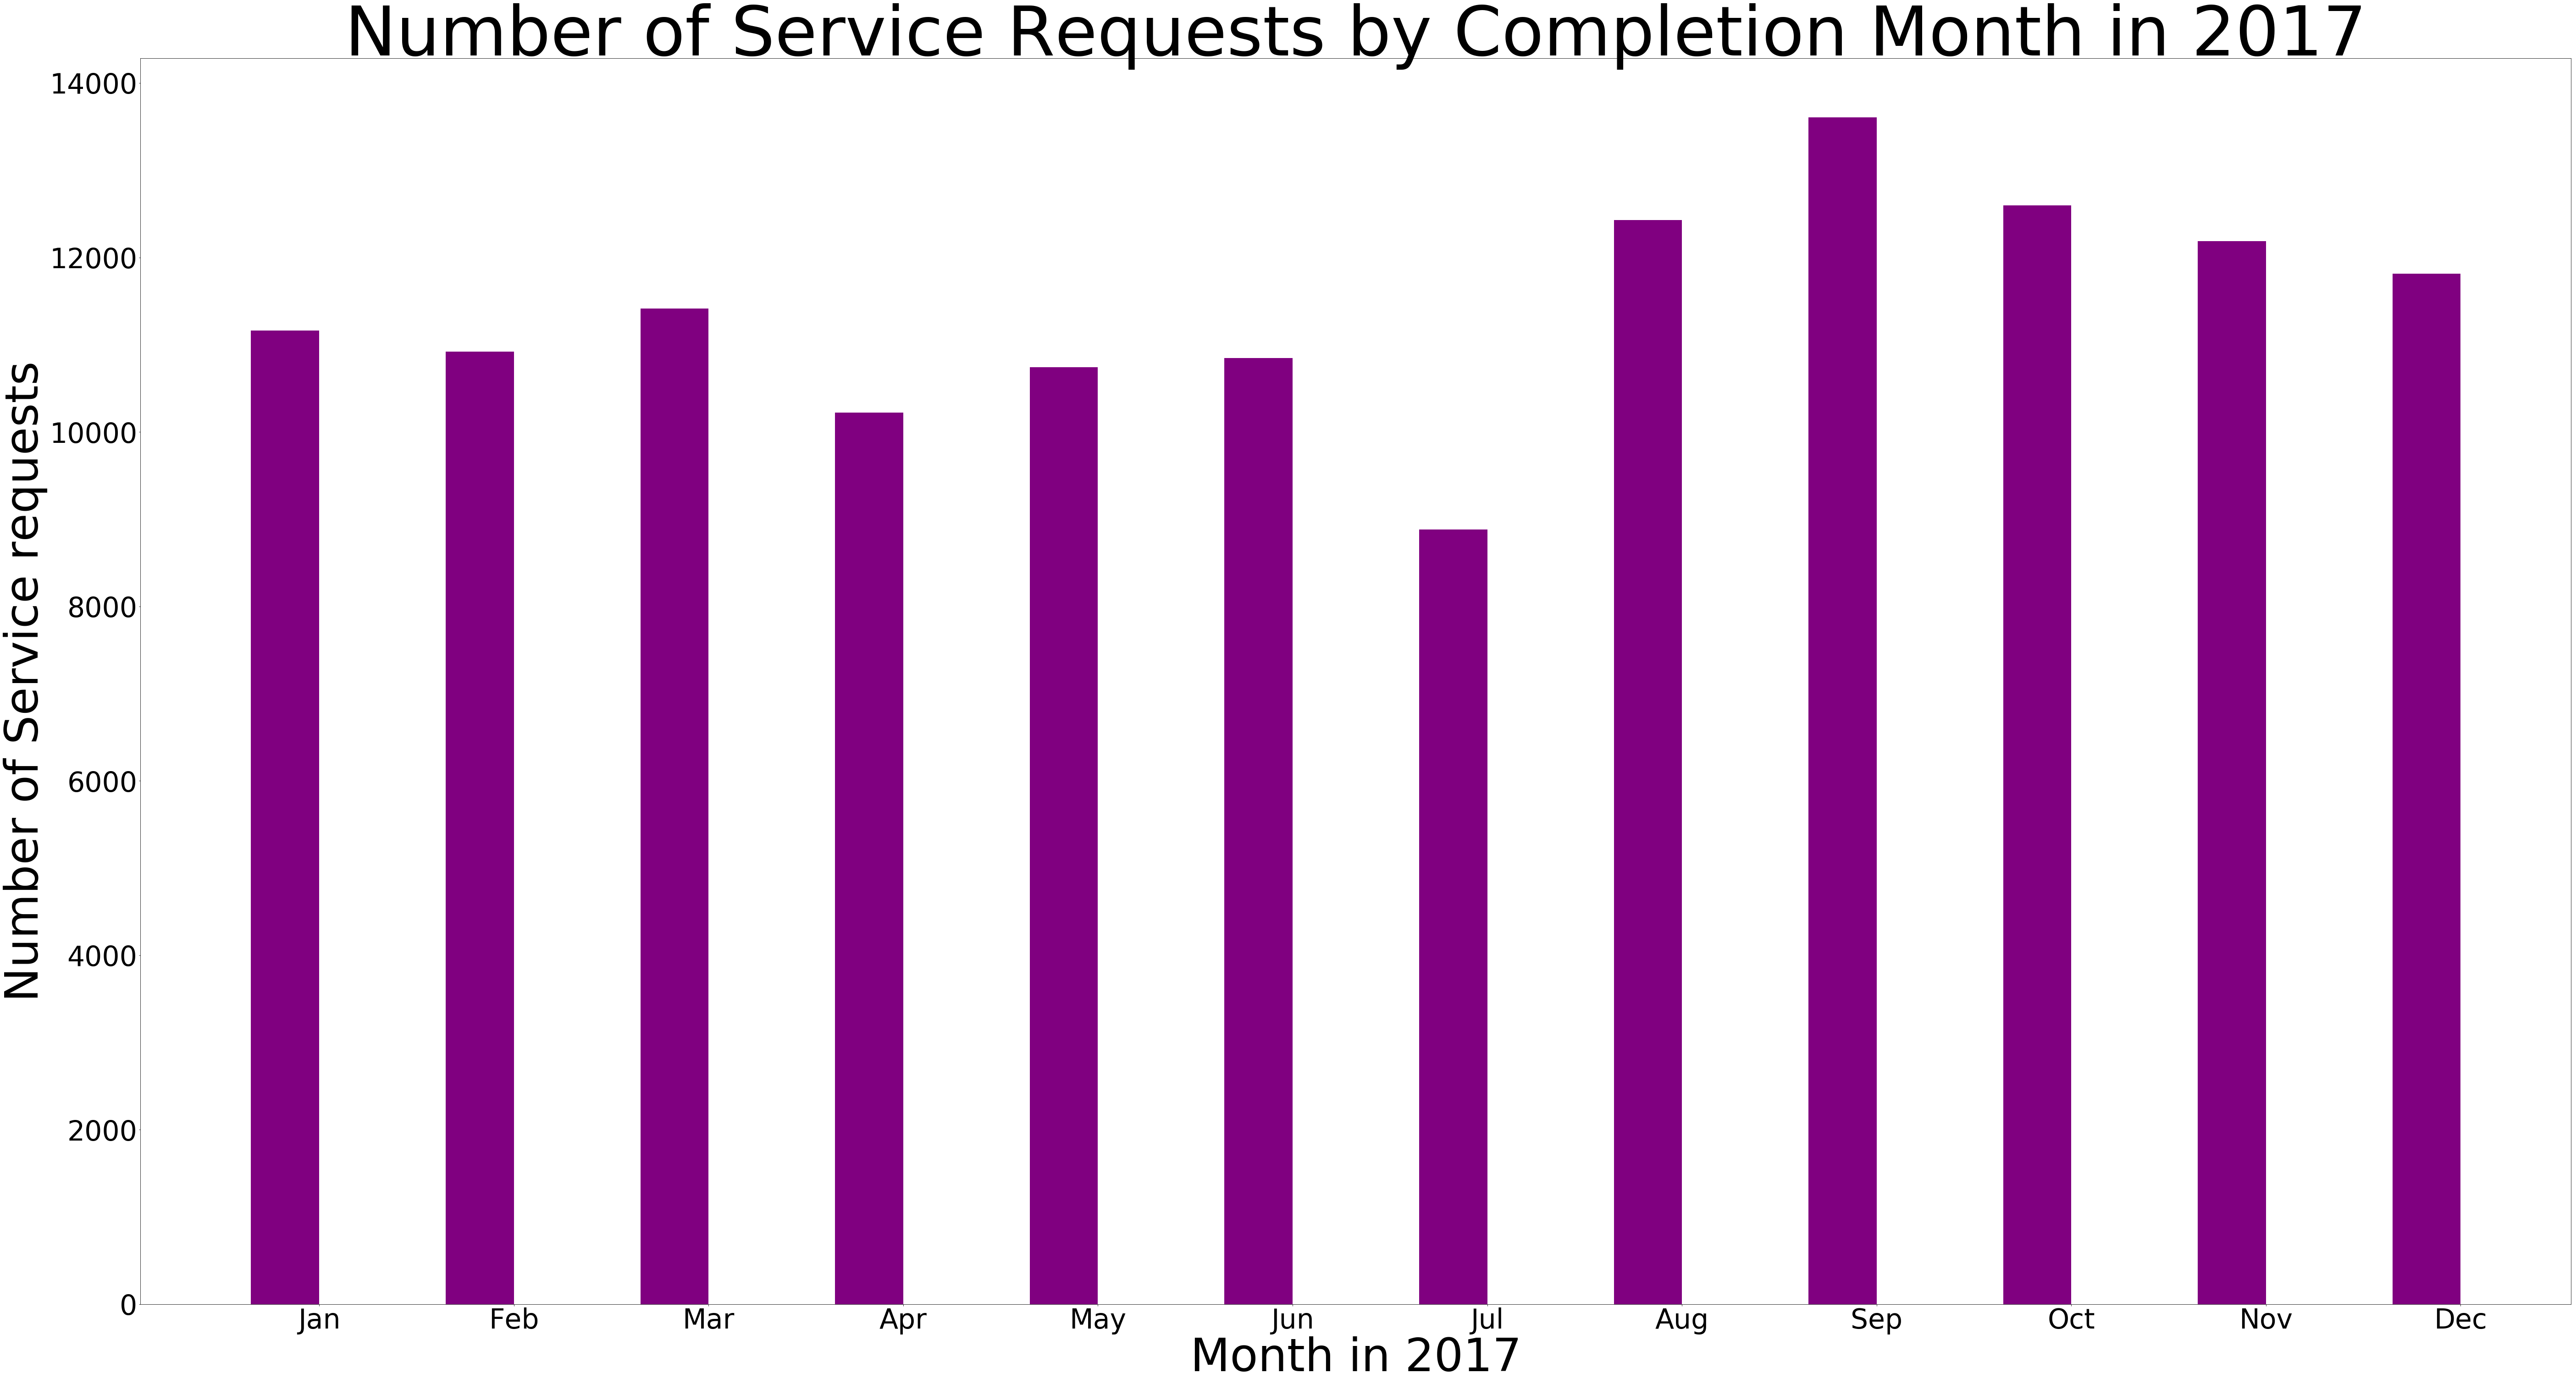

In [39]:
N = 12
x_vals = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ind = np.arange(N)# the x locations for the groups
width = 0.35

fig, ax = plt.subplots()
r = ax.bar(ind, y_val, width, color='purple')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Service requests', fontsize=100)
ax.set_xlabel('Month in 2017',fontsize=100)
ax.set_title('Number of Service Requests by Completion Month in 2017',fontsize=150)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_vals)

rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

# Summary statistics of response time in days

In [50]:
concat_df['response time in days'].describe()

count    136824.000000
mean          6.444147
std          23.156539
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         403.000000
Name: response time in days, dtype: float64

# Correlation heatmap of all included variables (double click to zoom in)

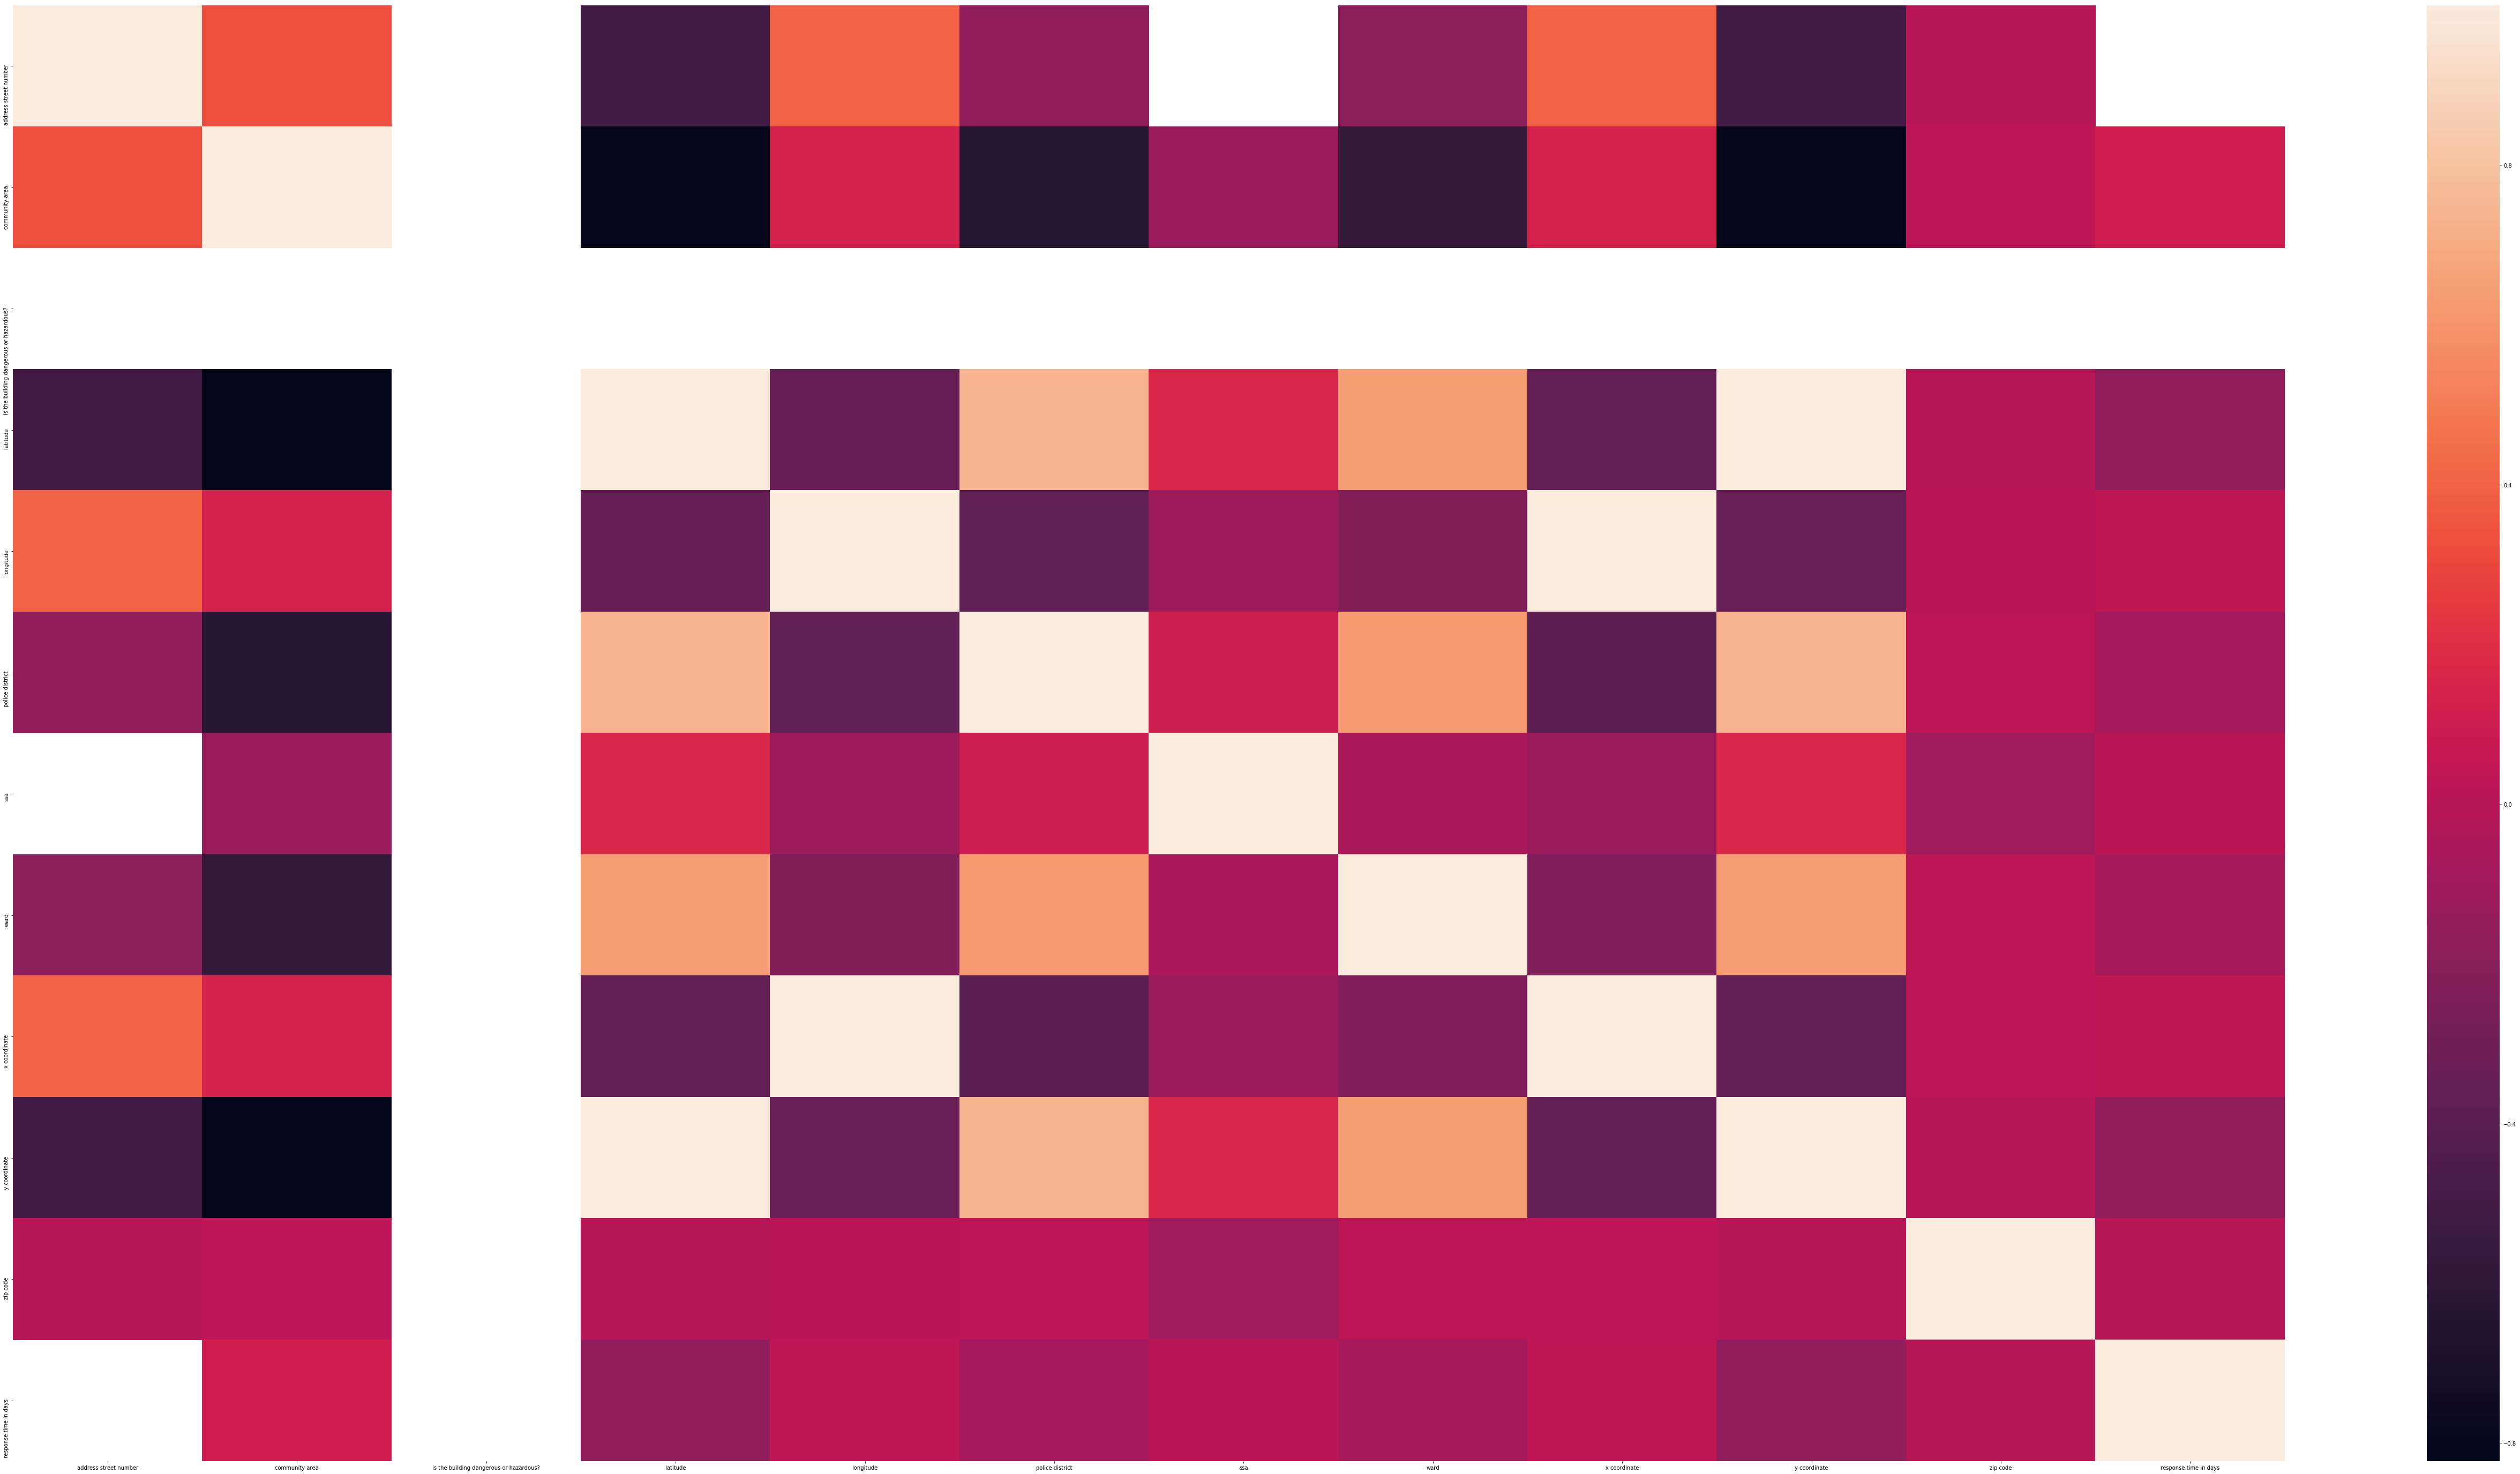

In [49]:
import seaborn as sns
corr = concat_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Problem 2: Data Augmentation and APIs

In [116]:
from census import Census
from us import states
import requests

c = Census("e2a3a7369cdb5dd4e2217498337ed118958c5322")
c.sf1.state_county_tract('NAME', states.IL.fips, '031', Census.ALL)

[{'NAME': 'Census Tract 101',
  'county': '031',
  'state': '17',
  'tract': '010100'},
 {'NAME': 'Census Tract 102.01',
  'county': '031',
  'state': '17',
  'tract': '010201'},
 {'NAME': 'Census Tract 102.02',
  'county': '031',
  'state': '17',
  'tract': '010202'},
 {'NAME': 'Census Tract 103',
  'county': '031',
  'state': '17',
  'tract': '010300'},
 {'NAME': 'Census Tract 104',
  'county': '031',
  'state': '17',
  'tract': '010400'},
 {'NAME': 'Census Tract 105.01',
  'county': '031',
  'state': '17',
  'tract': '010501'},
 {'NAME': 'Census Tract 105.02',
  'county': '031',
  'state': '17',
  'tract': '010502'},
 {'NAME': 'Census Tract 105.03',
  'county': '031',
  'state': '17',
  'tract': '010503'},
 {'NAME': 'Census Tract 106',
  'county': '031',
  'state': '17',
  'tract': '010600'},
 {'NAME': 'Census Tract 107.01',
  'county': '031',
  'state': '17',
  'tract': '010701'},
 {'NAME': 'Census Tract 107.02',
  'county': '031',
  'state': '17',
  'tract': '010702'},
 {'NAME': '

In [117]:
def get_FIPS(df):
    url1 = "https://geo.fcc.gov/api/census/block/find?latitude="
    url3 = "&longitude="
    url5 = "&showall=false&format=json"
    for row in df.iterrows():
        url_lat = str(row[1]['latitude'])
        url_long = str(row[1]['longitude'])
        url = url1 + url_lat + url3 + url_long + url5
        r = requests.get(url).json()
        FIPS = r['Block']['FIPS']
        county = FIPS[2:5]
        tract = FIPS[5:11]
        block = FIPS[11]

        acs_url = 'https://api.census.gov/data/2016/acs/acs5?get=NAME&for=block%20group:{}&in=state:17%20county:{}%20tract:{}&key=057067ab3c89ff8d3a7a8dc08534ca151bb76bb2'.format(block, county, tract)
        acs_data = requests.get(acs_url).json()
        print(acs_data)

In [118]:
get_FIPS(concat_df)

[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 4, Census Tract 6610, Cook County, Illinois', '17', '031', '661000', '4']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 408, Cook County, Illinois', '17', '031', '040800', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 8429, Cook County, Illinois', '17', '031', '842900', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 8311, Cook County, Illinois', '17', '031', '831100', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 409, Cook County, Illinois', '17', '031', '040900', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 2002, Cook County, Illinois', '17', '031', '200200', '3']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 2222, Cook County, Illinois', '17', '031', '222200', '2']]
[

[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 2001, Cook County, Illinois', '17', '031', '200100', '3']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 8412, Cook County, Illinois', '17', '031', '841200', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 8378, Cook County, Illinois', '17', '031', '837800', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 814.02, Cook County, Illinois', '17', '031', '081402', '3']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 409, Cook County, Illinois', '17', '031', '040900', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 8411, Cook County, Illinois', '17', '031', '841100', '3']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 2106.02, Cook County, Illinois', '17', '031', '210602', '

[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 409, Cook County, Illinois', '17', '031', '040900', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 2416, Cook County, Illinois', '17', '031', '241600', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 2430, Cook County, Illinois', '17', '031', '243000', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 633.01, Cook County, Illinois', '17', '031', '063301', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 409, Cook County, Illinois', '17', '031', '040900', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 5805.02, Cook County, Illinois', '17', '031', '580502', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 2426, Cook County, Illinois', '17', '031', '242600', '2

[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 6203, Cook County, Illinois', '17', '031', '620300', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 3108, Cook County, Illinois', '17', '031', '310800', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 814.02, Cook County, Illinois', '17', '031', '081402', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 1604, Cook County, Illinois', '17', '031', '160400', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 5805.02, Cook County, Illinois', '17', '031', '580502', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 2001, Cook County, Illinois', '17', '031', '200100', '3']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 814.02, Cook County, Illinois', '17', '031', '081402'

[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 1605.02, Cook County, Illinois', '17', '031', '160502', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 2406, Cook County, Illinois', '17', '031', '240600', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 409, Cook County, Illinois', '17', '031', '040900', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 8419, Cook County, Illinois', '17', '031', '841900', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 2423, Cook County, Illinois', '17', '031', '242300', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 2804, Cook County, Illinois', '17', '031', '280400', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 818, Cook County, Illinois', '17', '031', '081800', '2']

[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 1904.02, Cook County, Illinois', '17', '031', '190402', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 8330, Cook County, Illinois', '17', '031', '833000', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 8401, Cook County, Illinois', '17', '031', '840100', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 2106.02, Cook County, Illinois', '17', '031', '210602', '3']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 5906, Cook County, Illinois', '17', '031', '590600', '3']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 2426, Cook County, Illinois', '17', '031', '242600', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 8403, Cook County, Illinois', '17', '031', '840300',

[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 3106, Cook County, Illinois', '17', '031', '310600', '3']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 307.03, Cook County, Illinois', '17', '031', '030703', '3']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 3106, Cook County, Illinois', '17', '031', '310600', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 409, Cook County, Illinois', '17', '031', '040900', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 2430, Cook County, Illinois', '17', '031', '243000', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 818, Cook County, Illinois', '17', '031', '081800', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 4, Census Tract 1613, Cook County, Illinois', '17', '031', '161300', '4']]

[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 3, Census Tract 2414, Cook County, Illinois', '17', '031', '241400', '3']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 8309, Cook County, Illinois', '17', '031', '830900', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 6309, Cook County, Illinois', '17', '031', '630900', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 318, Cook County, Illinois', '17', '031', '031800', '1']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 4, Census Tract 1613, Cook County, Illinois', '17', '031', '161300', '4']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 2, Census Tract 3017.01, Cook County, Illinois', '17', '031', '301701', '2']]
[['NAME', 'state', 'county', 'tract', 'block group'], ['Block Group 1, Census Tract 8325, Cook County, Illinois', '17', '031', '832500', '1'

KeyboardInterrupt: 

In [119]:
race_df = pd.read_csv('/Users/saptarshighose/Downloads/Machine Learning/Homework 1/ACS_16_race.csv')

In [120]:
race_df.columns = ['zip code', 'white']

In [121]:
concat_copy = concat_df
combined_acs_df = concat_copy.merge(race_df, on = 'zip code')

In [122]:
combined_acs_df

,address street direction,address street name,address street number,address street suffix,"any people using property? (homeless, childen, gangs)",community area,completion date,creation date,"if the building is open, where is the entry point?",is building open or boarded?,...,street address,type of service request,ward,what type of surface is the graffiti on?,where is the graffiti located?,x coordinate,y coordinate,zip code,response time in days,white
0,NaN,NaN,NaN,NaN,NaN,66.0,2017-08-07,2017-08-07,NaN,NaN,...,7125 S MAPLEWOOD AVE,Graffiti Removal,18.0,Metal - Painted,Door,1.160606e+06,1.857320e+06,60629,0.0,41175
1,NaN,NaN,NaN,NaN,NaN,65.0,2017-08-07,2017-08-07,NaN,NaN,...,3604 W 62ND PL,Graffiti Removal,23.0,Brick - Painted,Garage,1.153365e+06,1.862931e+06,60629,0.0,41175
2,NaN,NaN,NaN,NaN,NaN,66.0,2017-08-07,2017-08-04,NaN,NaN,...,5915 S FRANCISCO AVE,Graffiti Removal,16.0,Brick - Unpainted,Alley,1.158058e+06,1.865286e+06,60629,3.0,41175
3,NaN,NaN,NaN,NaN,NaN,63.0,2017-08-07,2017-08-04,NaN,NaN,...,2940 W 59TH ST,Graffiti Removal,16.0,Brick - Painted,Front,1.157682e+06,1.865376e+06,60629,3.0,41175
4,NaN,NaN,NaN,NaN,NaN,65.0,2017-08-07,2017-08-04,NaN,NaN,...,4207 W 63RD ST,Graffiti Removal,23.0,Metal - Painted,Dumpster,1.149379e+06,1.862492e+06,60629,3.0,41175
5,NaN,NaN,NaN,NaN,NaN,63.0,2017-08-07,2017-08-07,NaN,NaN,...,5759 S FAIRFIELD AVE,Graffiti Removal,16.0,Metal - Painted,Garage,1.159025e+06,1.866348e+06,60629,0.0,41175
6,NaN,NaN,NaN,NaN,NaN,65.0,2017-08-07,2017-08-04,NaN,NaN,...,4437 W 63RD ST,Graffiti Removal,13.0,Brick - Painted,Alley,1.147765e+06,1.862456e+06,60629,3.0,41175
7,NaN,NaN,NaN,NaN,NaN,63.0,2017-08-07,2017-08-04,NaN,NaN,...,5619 S SACRAMENTO AVE,Graffiti Removal,16.0,Tree,Front,1.157336e+06,1.867229e+06,60629,3.0,41175
8,NaN,NaN,NaN,NaN,NaN,62.0,2017-08-07,2017-08-06,NaN,NaN,...,3718 W 58TH PL,Graffiti Removal,23.0,Metal - Painted,Alley,1.152586e+06,1.865561e+06,60629,1.0,41175
9,NaN,NaN,NaN,NaN,NaN,65.0,2017-08-07,2017-08-06,NaN,NaN,...,6017 S KOLMAR AVE,Graffiti Removal,13.0,Aluminum Siding,Garage,1.147067e+06,1.864322e+06,60629,1.0,41175


In [123]:
female_df = pd.read_csv('/Users/saptarshighose/Downloads/Machine Learning/Homework 1/ACS_16_female.csv')

In [124]:
combined_acs_df1 = combined_acs_df.merge(female_df, on = 'zip code')

In [125]:
combined_acs_df1

,address street direction,address street name,address street number,address street suffix,"any people using property? (homeless, childen, gangs)",community area,completion date,creation date,"if the building is open, where is the entry point?",is building open or boarded?,...,type of service request,ward,what type of surface is the graffiti on?,where is the graffiti located?,x coordinate,y coordinate,zip code,response time in days,white,Female Population
0,NaN,NaN,NaN,NaN,NaN,66.0,2017-08-07,2017-08-07,NaN,NaN,...,Graffiti Removal,18.0,Metal - Painted,Door,1.160606e+06,1.857320e+06,60629,0.0,41175,59237
1,NaN,NaN,NaN,NaN,NaN,65.0,2017-08-07,2017-08-07,NaN,NaN,...,Graffiti Removal,23.0,Brick - Painted,Garage,1.153365e+06,1.862931e+06,60629,0.0,41175,59237
2,NaN,NaN,NaN,NaN,NaN,66.0,2017-08-07,2017-08-04,NaN,NaN,...,Graffiti Removal,16.0,Brick - Unpainted,Alley,1.158058e+06,1.865286e+06,60629,3.0,41175,59237
3,NaN,NaN,NaN,NaN,NaN,63.0,2017-08-07,2017-08-04,NaN,NaN,...,Graffiti Removal,16.0,Brick - Painted,Front,1.157682e+06,1.865376e+06,60629,3.0,41175,59237
4,NaN,NaN,NaN,NaN,NaN,65.0,2017-08-07,2017-08-04,NaN,NaN,...,Graffiti Removal,23.0,Metal - Painted,Dumpster,1.149379e+06,1.862492e+06,60629,3.0,41175,59237
5,NaN,NaN,NaN,NaN,NaN,63.0,2017-08-07,2017-08-07,NaN,NaN,...,Graffiti Removal,16.0,Metal - Painted,Garage,1.159025e+06,1.866348e+06,60629,0.0,41175,59237
6,NaN,NaN,NaN,NaN,NaN,65.0,2017-08-07,2017-08-04,NaN,NaN,...,Graffiti Removal,13.0,Brick - Painted,Alley,1.147765e+06,1.862456e+06,60629,3.0,41175,59237
7,NaN,NaN,NaN,NaN,NaN,63.0,2017-08-07,2017-08-04,NaN,NaN,...,Graffiti Removal,16.0,Tree,Front,1.157336e+06,1.867229e+06,60629,3.0,41175,59237
8,NaN,NaN,NaN,NaN,NaN,62.0,2017-08-07,2017-08-06,NaN,NaN,...,Graffiti Removal,23.0,Metal - Painted,Alley,1.152586e+06,1.865561e+06,60629,1.0,41175,59237
9,NaN,NaN,NaN,NaN,NaN,65.0,2017-08-07,2017-08-06,NaN,NaN,...,Graffiti Removal,13.0,Aluminum Siding,Garage,1.147067e+06,1.864322e+06,60629,1.0,41175,59237


In [126]:
marital_status_df = pd.read_csv('/Users/saptarshighose/Downloads/Machine Learning/Homework 1/ACS_16_marital_status.csv')

In [127]:
combined_acs_df2 = combined_acs_df1.merge(marital_status_df, on = 'zip code')

# What types of blocks get “Vacant and Abandoned Buildings Reported?

In [130]:
combined_acs_df2.loc[(combined_acs_df2['type of service request'] == 'Vacant/Abandoned Building')]

,address street direction,address street name,address street number,address street suffix,"any people using property? (homeless, childen, gangs)",community area,completion date,creation date,"if the building is open, where is the entry point?",is building open or boarded?,...,ward,what type of surface is the graffiti on?,where is the graffiti located?,x coordinate,y coordinate,zip code,response time in days,white,Female Population,never married males
7871,W,63RD,2519.0,ST,True,66.0,NaT,2017-01-03,FRONT DOOR,Boarded,...,16.0,NaN,NaN,1.160583e+06,1.862798e+06,60629,NaN,41175,59237,48.9
7872,W,63RD,2521.0,ST,True,66.0,NaT,2017-01-03,NaN,Boarded,...,16.0,NaN,NaN,1.160562e+06,1.862798e+06,60629,NaN,41175,59237,48.9
7873,S,CAMPBELL,5921.0,AVE,False,66.0,NaT,2017-01-03,NaN,Boarded,...,16.0,NaN,NaN,1.160718e+06,1.865323e+06,60629,NaN,41175,59237,48.9
7874,W,LITHUANIAN PLAZA,2619.0,CT,True,66.0,NaT,2017-01-18,DOOR AND WINDOWS,Open,...,17.0,NaN,NaN,1.160027e+06,1.858797e+06,60629,NaN,41175,59237,48.9
7875,W,63RD,2517.0,ST,False,66.0,NaT,2017-01-24,ALL DOORS AND WINDOWS,Open,...,16.0,NaN,NaN,1.160604e+06,1.862799e+06,60629,NaN,41175,59237,48.9
7876,S,MAPLEWOOD,6730.0,AVE,True,66.0,NaT,2017-02-03,GARAGE DOOR OPEN,Open,...,17.0,NaN,NaN,1.160533e+06,1.859952e+06,60629,NaN,41175,59237,48.9
7877,S,SACRAMENTO,5815.0,AVE,False,63.0,NaT,2017-02-06,NaN,Open,...,16.0,NaN,NaN,1.157374e+06,1.865929e+06,60629,NaN,41175,59237,48.9
7878,S,ARTESIAN,7319.0,AVE,False,66.0,NaT,2017-02-14,BACK DOOR,Open,...,18.0,NaN,NaN,1.161310e+06,1.856051e+06,60629,NaN,41175,59237,48.9
7879,S,ARTESIAN,6131.0,AVE,False,66.0,NaT,2017-02-17,FRONT,Open,...,16.0,NaN,NaN,1.161090e+06,1.863935e+06,60629,NaN,41175,59237,48.9
7880,S,TALMAN,6837.0,AVE,False,66.0,NaT,2017-02-22,NaN,Boarded,...,17.0,NaN,NaN,1.159887e+06,1.859210e+06,60629,NaN,41175,59237,48.9


# What types of blocks get Alley Lights Out reported?

In [166]:
white_df = combined_acs_df2[['type of service request', 'white', 'Female Population', 'never married males']]

In [167]:
white_complaints = white_df.groupby(['type of service request'])
white_complaints.describe()

Female Population                              \
                                      count          mean           std   
type of service request                                                   
Alley Light Out                     27861.0  34438.850939  11569.562262   
Graffiti Removal                   112714.0  35888.621245  11664.881642   
Vacant/Abandoned Building            3635.0  31496.480880  10222.722319   

                                                                       \
                              min      25%      50%      75%      max   
type of service request                                                 
Alley Light Out             315.0  26678.0  35221.0  43036.0  59237.0   
Graffiti Removal            315.0  27625.0  35532.0  44565.0  59237.0   
Vacant/Abandoned Building  4483.0  20161.0  32961.0  38456.0  59237.0   

                              white                                     \
                              count          mean           std    min   
type of service request                                                  
Alley Light Out             27861.0  27352.502459  20755.474284  381.0   
Graffiti Removal           112714.0  42131.204030  19057.643123  381.0   
Vacant/Abandoned Building    3635.0  11837.202201  16034.523101  517.0   

                                                               
                               25%      50%      75%      max  
type of service request                                        
Alley Light Out             8668.0  29548.0  41320.0  77910.0  
Graffiti Removal           30620.0  40993.0  51468.0  77910.0  
Vacant/Abandoned Building    835.0   2766.0  29221.0  77910.0

In [183]:
response_time_df = combined_acs_df2[['type of service request', 'response time in days']]
response_time_df = response_time_df.groupby(['type of service request'])
response_time_df.describe()

response time in days                             \
                                          count       mean        std  min   
type of service request                                                      
Alley Light Out                         24021.0  33.501478  46.455796  0.0   
Graffiti Removal                       112710.0   0.676133   1.121634  0.0   
Vacant/Abandoned Building                   0.0        NaN        NaN  NaN   

                                                   
                           25%   50%   75%    max  
type of service request                            
Alley Light Out            2.0  14.0  48.0  403.0  
Graffiti Removal           0.0   0.0   1.0   56.0  
Vacant/Abandoned Building  NaN   NaN   NaN    NaN

# Problem 3

In [199]:
prob_df = combined_acs_df2.loc[combined_acs_df2['zip code'].isin([60624.0, 60612.0])]
prob_df.groupby('type of service request').describe()

Female Population                            \
                                      count          mean         std   
type of service request                                                 
Alley Light Out                       953.0  19483.293809  908.380810   
Graffiti Removal                     2261.0  18527.519239  652.488669   
Vacant/Abandoned Building             198.0  19663.585859  835.588331   

                                                                        \
                               min      25%      50%      75%      max   
type of service request                                                  
Alley Light Out            18267.0  18267.0  20161.0  20161.0  20161.0   
Graffiti Removal           18267.0  18267.0  18267.0  18267.0  20161.0   
Vacant/Abandoned Building  18267.0  18267.0  20161.0  20161.0  20161.0   

                          address street number                   ...       \
                                          count         mean      ...        
type of service request                                           ...        
Alley Light Out                             0.0          NaN      ...        
Graffiti Removal                            0.0          NaN      ...        
Vacant/Abandoned Building                 198.0  2966.843434      ...        

                           x coordinate               y coordinate  \
                                    75%           max        count   
type of service request                                              
Alley Light Out            1.156720e+06  1.165389e+06        953.0   
Graffiti Removal           1.162186e+06  1.165845e+06       2261.0   
Vacant/Abandoned Building  1.155318e+06  1.163562e+06        198.0   

                                                                    \
                                   mean          std           min   
type of service request                                              
Alley Light Out            1.899126e+06  2549.891895  1.894365e+06   
Graffiti Removal           1.900604e+06  2950.957750  1.894333e+06   
Vacant/Abandoned Building  1.899488e+06  2633.800354  1.894335e+06   

                                                                     \
                                    25%           50%           75%   
type of service request                                               
Alley Light Out            1.897323e+06  1.898984e+06  1.900691e+06   
Graffiti Removal           1.898070e+06  1.901236e+06  1.903018e+06   
Vacant/Abandoned Building  1.897644e+06  1.899324e+06  1.901465e+06   

                                         
                                    max  
type of service request                  
Alley Light Out            1.905080e+06  
Graffiti Removal           1.905194e+06  
Vacant/Abandoned Building  1.904607e+06  

[3 rows x 104 columns]

In [200]:
prob_df1 = combined_acs_df2.loc[combined_acs_df2['zip code'].isin([60613.0, 60640.0])]
prob_df1.groupby('type of service request').describe()

Female Population                             \
                                      count          mean          std   
type of service request                                                  
Alley Light Out                       371.0  29415.433962  3846.187545   
Graffiti Removal                     5120.0  28451.722461  3924.063579   
Vacant/Abandoned Building               3.0  32527.000000     0.000000   

                                                                        \
                               min      25%      50%      75%      max   
type of service request                                                  
Alley Light Out            24674.0  24674.0  32527.0  32527.0  32527.0   
Graffiti Removal           24674.0  24674.0  24674.0  32527.0  32527.0   
Vacant/Abandoned Building  32527.0  32527.0  32527.0  32527.0  32527.0   

                          address street number              ...       \
                                          count    mean      ...        
type of service request                                      ...        
Alley Light Out                             0.0     NaN      ...        
Graffiti Removal                            0.0     NaN      ...        
Vacant/Abandoned Building                   3.0  3858.0      ...        

                           x coordinate               y coordinate  \
                                    75%           max        count   
type of service request                                              
Alley Light Out            1.167929e+06  1.170942e+06        371.0   
Graffiti Removal           1.167974e+06  1.173084e+06       5120.0   
Vacant/Abandoned Building  1.165214e+06  1.165971e+06          3.0   

                                                                    \
                                   mean          std           min   
type of service request                                              
Alley Light Out            1.930279e+06  4110.870038  1.923919e+06   
Graffiti Removal           1.929401e+06  3770.270189  1.923914e+06   
Vacant/Abandoned Building  1.934396e+06  3691.625642  1.930160e+06   

                                                                     \
                                    25%           50%           75%   
type of service request                                               
Alley Light Out            1.926252e+06  1.930707e+06  1.933970e+06   
Graffiti Removal           1.926257e+06  1.929265e+06  1.932048e+06   
Vacant/Abandoned Building  1.933130e+06  1.936099e+06  1.936514e+06   

                                         
                                    max  
type of service request                  
Alley Light Out            1.937095e+06  
Graffiti Removal           1.937341e+06  
Vacant/Abandoned Building  1.936929e+06  

[3 rows x 104 columns]